# Krigeage avec le package «automap»

Dans cet exemple, nous utilisons le package R "automap" pour faire un krigeage ordinaire.

Nous pouvons l'installer soit à travers l'interface graphique dans R, ou à travers la commande ci-dessous:

In [ ]:
install.packages("automap")

Il faut encore activer le package:

In [1]:
library(automap)

Loading required package: sp
Warning message:
“package ‘sp’ was built under R version 3.2.5”

Nous chargeons aussi le fichier des données, qui est dans le dossier datasets/samples. Il s'agit d'un fichier TSV (tab-separated values, mais c'est en principe juste un fichier texte).

Pour le lire dans R, on peut utiliser la commande suivante. Les données du fichier se trouvent après dans la variable s.

In [2]:
s = read.delim(file="datasets/samples/samples.tsv")

On va commencer par faire une petite inspection des données:

In [3]:
summary(s)
s

      pid               x                y               t         
 Min.   :  1.00   Min.   :  1.00   Min.   :  1.0   Min.   :0.8851  
 1st Qu.: 25.75   1st Qu.: 40.75   1st Qu.: 27.5   1st Qu.:2.2206  
 Median : 50.50   Median : 80.50   Median : 60.5   Median :2.7602  
 Mean   : 50.50   Mean   : 80.05   Mean   : 58.1   Mean   :2.7182  
 3rd Qu.: 75.25   3rd Qu.:122.75   3rd Qu.: 89.0   3rd Qu.:3.1629  
 Max.   :100.00   Max.   :156.00   Max.   :109.0   Max.   :4.9634  

pid,x,y,t
1,133,1,2.51787
2,39,2,1.80969
3,47,2,1.13111
4,9,4,1.33558
5,81,4,2.52472
6,50,8,1.83759
7,148,8,2.92934
8,76,10,2.85060
9,125,10,3.20828
10,133,10,3.04755


- La colonne __pid__ est un identifiant du point de mesure.
- __x__ est __y__ sont les coordonnées géographiques des points de mesures.
- La colonne __t__ contient la valeur mesurée à interpoler.

Ici, nous avons un dataframe standard. Pour faire fonctionner le krigeage, nous devons le convertir un dataframe spatial, en indiquant simplement quelles colonnes contiennent les coordonnées x et y:

In [4]:
coordinates(s) = ~ x + y

Nous pouvons vérifier si la conversion a bien fonctionné:

In [5]:
class(s)

[1] "SpatialPointsDataFrame"
attr(,"package")
[1] "sp"

Nous devons définir la grille sur laquelle nous voulons effectuer le krigeage. En l'occurrence, le bounding box de notre région va de 0 à 160 pour la coordonnée x, et de 0 à 112 pour la coordonnée y. Nous choisissons une taille de pixel de 1.

In [6]:
g = SpatialGrid(grid=GridTopology(cellcentre.offset=c(0,0), cellsize=c(1,1), cells.dim=c(160,112)))

Le krigeage peut être effectué simplement avec `autoKrige`. Le variogramme est calculé automatiquement et un modèle optimal sélectionné.

Dans cet exemple `t` est le nom de la variable avec les valeurs à interpoler, `s` est le tableau de données contenant la colonne `t`, et `g` et notre grille de points sur lesquelles on veut faire l'interpolation:

In [7]:
krig_result = autoKrige(t~1, s, g)

[using ordinary kriging]


Warning message in sqrt(krige_result$var1.var):
“NaNs produced”

On peut rapidement visualiser le résultat, l'erreur liée au résultat, ainsi que le variogramme empirique et le modèle trouvé.

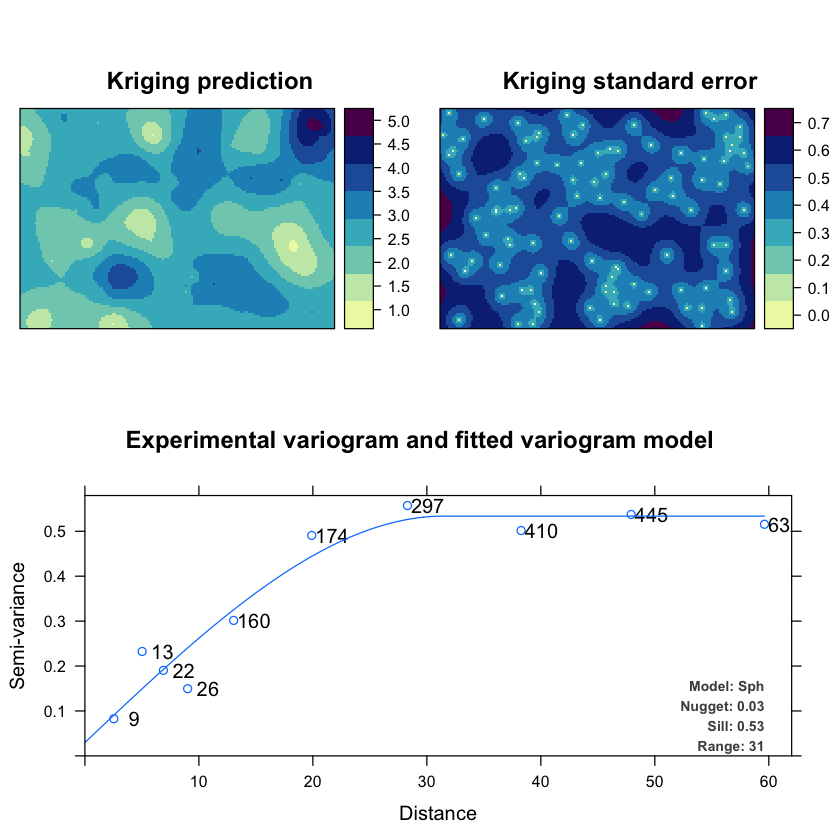

In [8]:
plot(krig_result)

En l'occurrence, nous avons un variogramme sphérique avec un nugget de 0.03, un sill de 0.53 et un range de 31, ce qui est un très bon modèle.

On peut exporter le résultat du krigeage dans un fichier GeoTIFF que nous pouvons après utiliser dans QGIS ou ArcGIS:

In [9]:
library(rgdal)
writeGDAL(krig_result$krige_output, "datasets/samples/samples-raster/samples-krig.tif")

Warning message:
“package ‘rgdal’ was built under R version 3.2.5”rgdal: version: 1.2-5, (SVN revision 648)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.1.2, released 2016/10/24
 Path to GDAL shared files: /usr/local/share/gdal
 Loaded PROJ.4 runtime: Rel. 4.9.1, 04 March 2015, [PJ_VERSION: 491]
 Path to PROJ.4 shared files: (autodetected)
 Linking to sp version: 1.2-3 


__Étant donné que les données utilisées sont des données simulées, nous pouvons comparer le résultat (première image ci-dessous) avec la «vérité» (deuxième image):__

Warning message:
“package ‘raster’ was built under R version 3.2.5”

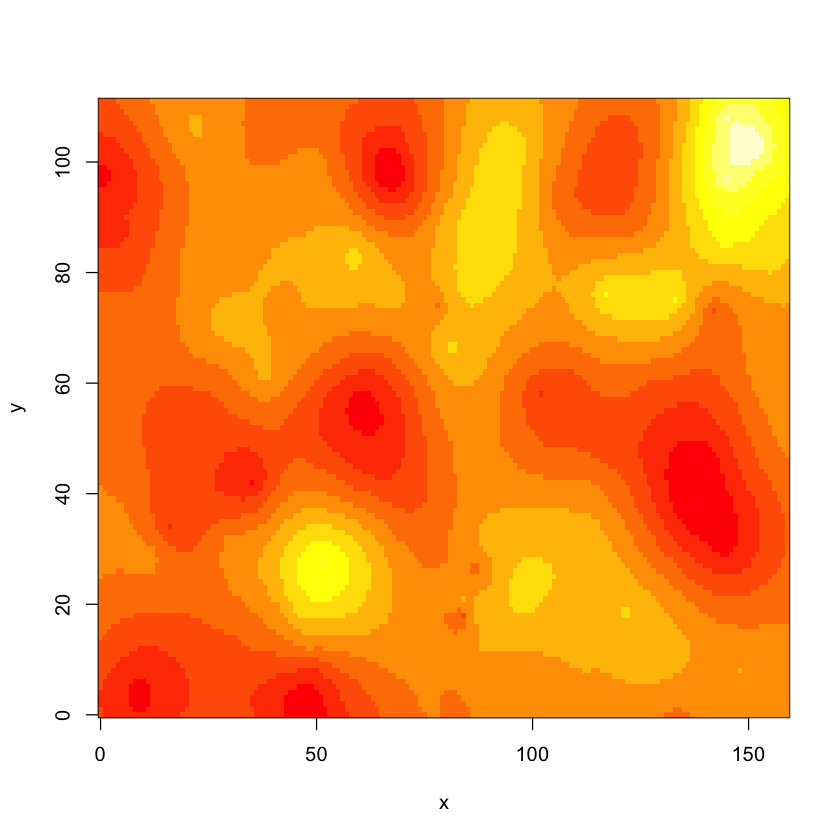

In [10]:
library(raster)
samples_result = raster("datasets/samples/samples-raster/samples-krig.tif")
image(samples_result)

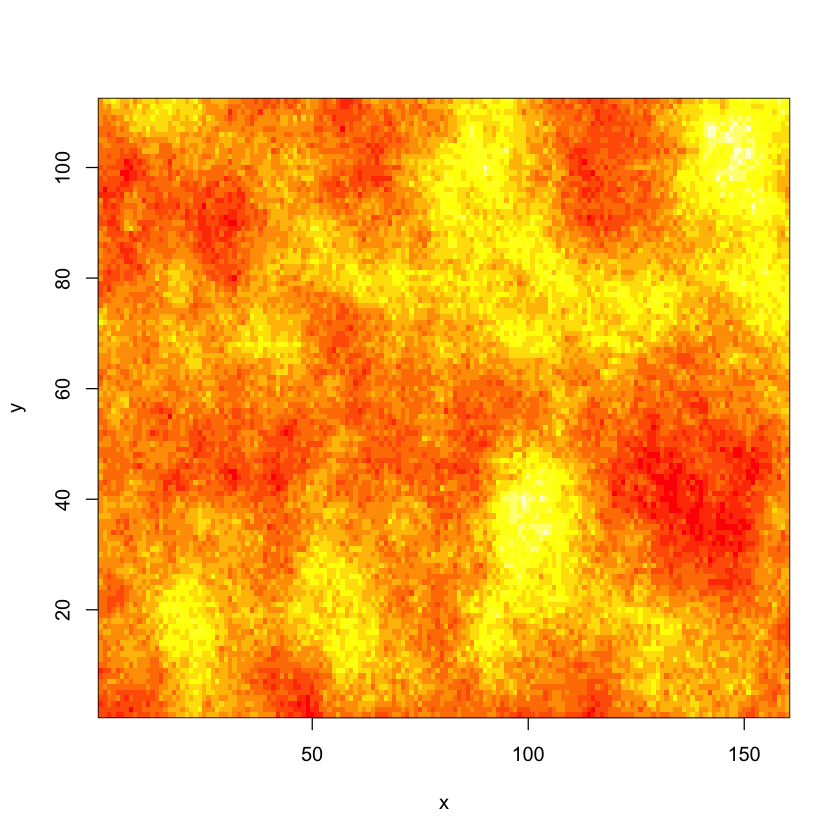

In [11]:
sim = raster("datasets/samples/samples-raster/sim.tif")
image(sim)

Au final, le résultat du krigeage automatique est très bon. Le variogramme trouvé est très similaire à celui utilisé pour la simulation des données de départ; il sera donc difficile de faire mieux avec le krigeage.

Par contre, l'effet de lissage dû à l'interpolation est rès bien visible, et c'est une image à garder en tête pour tout utilisateur du krigeage, notamment pour faire une interprétation!